## Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $0$ and $1$.

<img width=600px src="SquareFunction.png">

In [29]:
def squareFunction(x):
    ### TO DO: Create a square function
    n = x//(2 * math.pi)
    a = x - (n * 2 * math.pi)
    if a < math.pi:
        return 1
    elif a > math.pi:
        return -1

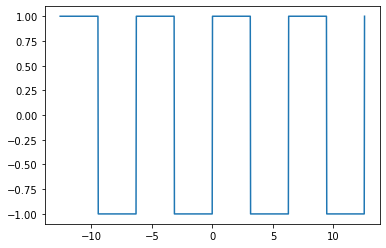

In [30]:
### TO DO: Plot the square function from (-4pi, 4pi)
x = np.linspace(-4*math.pi, 4*math.pi, 1000)
y = np.zeros(x.size)
a = 0
while a < x.size:
    y[a] = squareFunction(x[a])
    a = a + 1
plt.plot(x, y)

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [31]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the dourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    answer = 0
    i = 0
    while i < k:
        answer = answer + (bk[i] * math.sin((i + 1) * x))
        i = i + 1
    ### TO DO: Create the fourier sine series sum
    return answer

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [32]:
def integrand(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients 
    return squareFunction(x) * math.sin(k*x)

In [33]:
## TO DO: Calculate the b_k coefficient values
bk = np.zeros(5)
i = 0
while i < bk.size:
    integration, error = quad(integrand, 0, math.pi, args = i+1)
    bk[i] = (2/math.pi) * integration
    i = i + 1
print(bk)


[ 1.27323954e+00  7.07125884e-17  4.24413182e-01 -3.27243316e-17
  2.54647909e-01]


Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

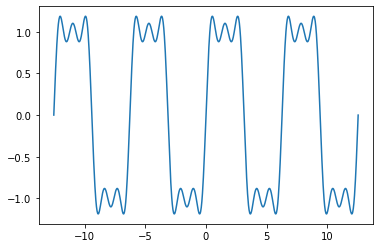

In [34]:
## TO DO: Plot the sum of the first 5 elements. 
x = np.linspace(-4*math.pi, 4*math.pi, 1000)
y = np.zeros(x.size)
bk = np.zeros(5)
i = 0
while i < bk.size:
    integration, error = quad(integrand, 0, math.pi, args = i+1)
    bk[i] = (2/math.pi) * integration
    i = i + 1
j = 0
while j < y.size:
    y[j] = fourierSineSeries(bk.size, bk, x[j])
    j = j + 1
plt.plot(x, y)

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

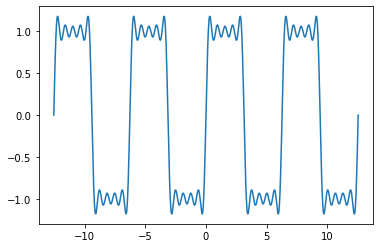

In [35]:
## TO DO: Plot the sum of the first 10coefficient  elements.
x = np.linspace(-4*math.pi, 4*math.pi, 1000)
y = np.zeros(x.size)
bk = np.zeros(10)
i = 0
while i < bk.size:
    integration, error = quad(integrand, 0, math.pi, args = i+1)
    bk[i] = (2/math.pi) * integration
    i = i + 1
j = 0
while j < y.size:
    y[j] = fourierSineSeries(bk.size, bk, x[j])
    j = j + 1
plt.plot(x, y)

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

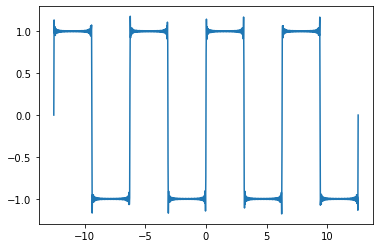

In [36]:
## TO DO: Plot the sum of the first 100 elements.
x = np.linspace(-4*math.pi, 4*math.pi, 1000)
y = np.zeros(x.size)
bk = np.zeros(100)
i = 0
while i < bk.size:
    integration, error = quad(integrand, 0, math.pi, args = i+1)
    bk[i] = (2/math.pi) * integration
    i = i + 1
j = 0
while j < y.size:
    y[j] = fourierSineSeries(bk.size, bk, x[j])
    j = j + 1
plt.plot(x, y)